### Boosting 
Lluvia En Australia

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.tree import DecisionTreeClassifier

import sklearn.metrics as metrics

from sklearn.model_selection import learning_curve

In [3]:
data = pd.read_csv("weatherAUS.csv")
# Columnas con muchos NaNs
columnas_descartables = ['Sunshine','Evaporation','Cloud3pm','Cloud9am','Location','Date']
data = data.drop(columns=columnas_descartables)
data = data.dropna()

# Columnas con variables categoricas
columnas_descartables = ['WindGustDir','WindDir9am','WindDir3pm','RainToday']
data = data.drop(columns=columnas_descartables)

# Variables correlacionadas
data = data.drop(columns=['Temp3pm', 'Pressure9am'])

# Mapeo
data['RainTomorrow'] = data['RainTomorrow'].map({'Yes':1,'No':0})

In [4]:
data.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Temp9am,RainTomorrow
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.1,16.9,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1007.8,17.2,0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1008.7,21.0,0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1012.8,18.1,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1006.0,17.8,0


In [5]:
columnas_entrenamiento = ['MaxTemp', 'Humidity3pm']
X = data[columnas_entrenamiento]
y = data.RainTomorrow

# Separamos los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify = y)

##### Importamos los modelos

In [6]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

##### Fiteamos

In [7]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),algorithm='SAMME', n_estimators=50)
# Entrenamos el modelo
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=2))

##### Predecimos y medimos el Accuracy atraves de Accuracy_score

In [8]:
y_train_pred = ada_clf.predict(X_train)
y_test_pred = ada_clf.predict(X_test)
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))

0.8293167356129897
0.8314245232894504


Text(0.5, 0, 'Número de árbol')

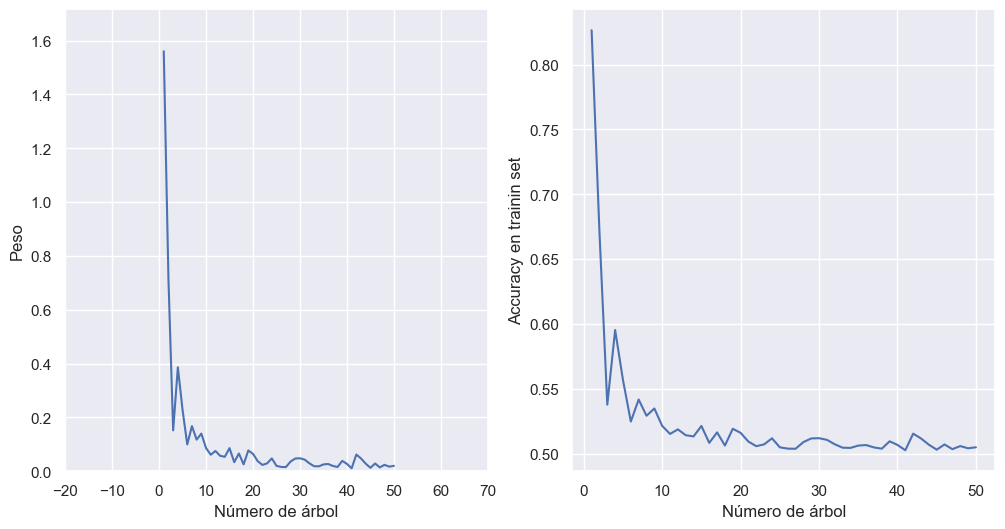

In [9]:
# Puede que el algoritmo termine antes de agregar todos los arboles
# Tomamos entonces la cantidad de arboles que realmente tiene el ensamble
numero_arboles = len(ada_clf)

# En la variable estimator_weights_ esta el peso de cada arbol
pesos = ada_clf.estimator_weights_[:numero_arboles]

# Calculamos el accuracy DE CADA ARBOL en el ensamble. En estimator_errors_ esta el error que comete cada uno.
errores_arboles = ada_clf.estimator_errors_[:numero_arboles]
accuracy_arboles = 1-errores_arboles

# Graficamos
plt.figure(figsize = (12,6))
plt.subplot(121)
# En el eje 'x' ponemos el índice (número) de cada arbol, en el 'y' los pesos
plt.plot(range(1, numero_arboles + 1), pesos)
plt.ylabel('Peso')
plt.xlabel('Número de árbol')
plt.ylim((0, pesos.max() * 1.1))
plt.xlim((-20, numero_arboles + 20))
plt.subplot(122)
# En el eje 'x' ponemos el índice (número) de cada arbol, en el 'y' el accuracy de cada arbol
plt.plot(range(1, numero_arboles + 1), accuracy_arboles)
plt.ylabel('Accuracy en trainin set')
plt.xlabel('Número de árbol')

In [10]:
ada_clf.estimator_weights_

array([1.5605508 , 0.71240112, 0.15186848, 0.38637602, 0.22822051,
       0.09961752, 0.16775614, 0.11747105, 0.13992466, 0.08612258,
       0.06128262, 0.07539076, 0.05738743, 0.05369652, 0.0858911 ,
       0.03371549, 0.06609173, 0.02551259, 0.07725582, 0.06463169,
       0.03754463, 0.02353321, 0.02920704, 0.04773908, 0.02001846,
       0.01601895, 0.01551996, 0.03604602, 0.04739411, 0.04821315,
       0.04312854, 0.02948214, 0.01884619, 0.0181929 , 0.02536646,
       0.02700469, 0.01972476, 0.01581784, 0.03862841, 0.02735396,
       0.01099288, 0.06215013, 0.04735676, 0.02814838, 0.01282267,
       0.02881   , 0.01430211, 0.02387163, 0.01704219, 0.02016181])

In [11]:
ada_clf.estimator_errors_

array([0.17356762, 0.3290685 , 0.46210568, 0.40459   , 0.44319123,
       0.47511619, 0.45815904, 0.47066596, 0.4650758 , 0.47848265,
       0.48468414, 0.48116123, 0.48565708, 0.4865791 , 0.47854042,
       0.49157193, 0.48348308, 0.4936222 , 0.48069564, 0.4838477 ,
       0.49061495, 0.49411697, 0.49269876, 0.4880675 , 0.49499555,
       0.49599535, 0.49612009, 0.49098947, 0.48815369, 0.48794905,
       0.48921954, 0.49263   , 0.49528859, 0.4954519 , 0.49365872,
       0.49324924, 0.49506897, 0.49604562, 0.4903441 , 0.49316194,
       0.49725181, 0.48446747, 0.48816302, 0.49296337, 0.49679438,
       0.492798  , 0.49642453, 0.49403238, 0.49573956, 0.49495972])

c:\Users\Emanu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
c:\Users\Emanu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


Text(0.5, 0, 'Número de árboles')

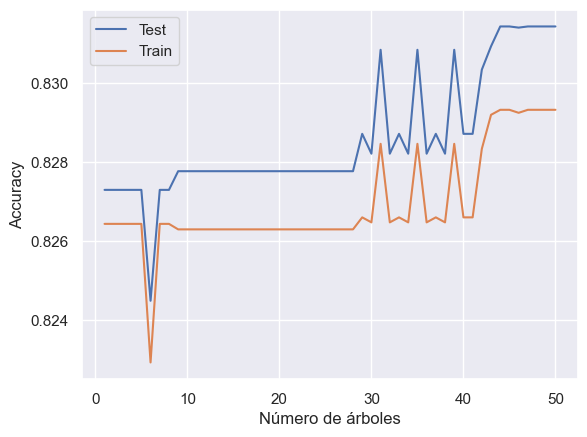

In [12]:
accuracy_test = []
accuracy_train = []
# Calculamos el accuracy sobre el test set
for prediccion_test in ada_clf.staged_predict(X_test):
    accuracy_test.append(metrics.accuracy_score(prediccion_test,y_test))
    
for prediccion_train in ada_clf.staged_predict(X_train):    
    accuracy_train.append(metrics.accuracy_score(prediccion_train,y_train))
    
plt.plot(range(1, len(accuracy_test) + 1), accuracy_test, label = 'Test')
plt.plot(range(1, len(accuracy_test) + 1), accuracy_train, label = 'Train')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Número de árboles')

In [13]:
ada_clf.estimators_

[DecisionTreeClassifier(max_depth=2, random_state=1599807801),
 DecisionTreeClassifier(max_depth=2, random_state=784117201),
 DecisionTreeClassifier(max_depth=2, random_state=301663632),
 DecisionTreeClassifier(max_depth=2, random_state=2144443508),
 DecisionTreeClassifier(max_depth=2, random_state=372009805),
 DecisionTreeClassifier(max_depth=2, random_state=1077602930),
 DecisionTreeClassifier(max_depth=2, random_state=2104744104),
 DecisionTreeClassifier(max_depth=2, random_state=1114960249),
 DecisionTreeClassifier(max_depth=2, random_state=1365502233),
 DecisionTreeClassifier(max_depth=2, random_state=36346766),
 DecisionTreeClassifier(max_depth=2, random_state=436473897),
 DecisionTreeClassifier(max_depth=2, random_state=1766719694),
 DecisionTreeClassifier(max_depth=2, random_state=1963944500),
 DecisionTreeClassifier(max_depth=2, random_state=178697006),
 DecisionTreeClassifier(max_depth=2, random_state=22982384),
 DecisionTreeClassifier(max_depth=2, random_state=366620817),
 D

In [14]:
estimador0 = ada_clf.estimators_[0]
y_test_pred_0 = estimador0.predict(X_test)
print(metrics.accuracy_score(y_test, y_test_pred_0))

0.8272920479367141


c:\Users\Emanu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [15]:
estimador1 = ada_clf.estimators_[1]
y_test_pred_1 = estimador1.predict(X_test)
print(metrics.accuracy_score(y_test, y_test_pred_1))

0.6765747682862034


c:\Users\Emanu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [16]:
estimador10 = ada_clf.estimators_[9]
y_test_pred_10 = estimador10.predict(X_test)
print(metrics.accuracy_score(y_test, y_test_pred_10))

0.8034712792962985


c:\Users\Emanu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [17]:
estimador30 = ada_clf.estimators_[29]
y_test_pred_30 = estimador30.predict(X_test)
print(metrics.accuracy_score(y_test, y_test_pred_30))

0.7812444654347954


c:\Users\Emanu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [18]:
estimador50 = ada_clf.estimators_[49]
y_test_pred_50 = estimador50.predict(X_test)
print(metrics.accuracy_score(y_test, y_test_pred_50))

0.25234665564673237


c:\Users\Emanu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [19]:
y_test_pred_final = ada_clf.predict(X_test)
print(metrics.accuracy_score(y_test, y_test_pred_final))

0.8314245232894504


In [20]:
estimador0.predict_proba(X_test) 

c:\Users\Emanu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([[0.915636  , 0.084364  ],
       [0.915636  , 0.084364  ],
       [0.74242493, 0.25757507],
       ...,
       [0.915636  , 0.084364  ],
       [0.915636  , 0.084364  ],
       [0.915636  , 0.084364  ]])

In [21]:
estimador50.predict_proba(X_test) 

c:\Users\Emanu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([[0.49726384, 0.50273616],
       [0.49726384, 0.50273616],
       [0.49726384, 0.50273616],
       ...,
       [0.49726384, 0.50273616],
       [0.49726384, 0.50273616],
       [0.49726384, 0.50273616]])

c:\Users\Emanu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
c:\Users\Emanu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


Text(0.5, 0, 'Número de árboles')

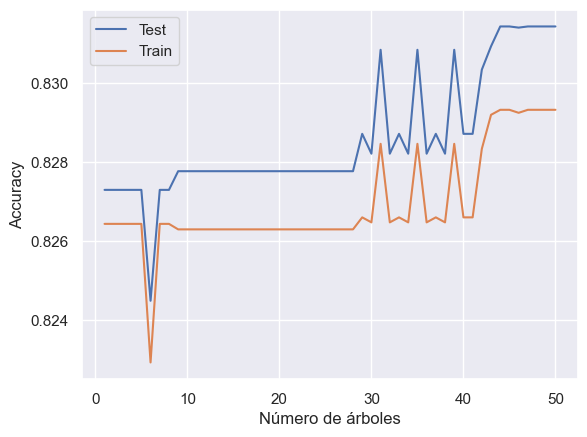

In [22]:
accuracy_test = []
accuracy_train = []
# Calculamos el accuracy sobre el test set
for prediccion_test in ada_clf.staged_predict(X_test):
    accuracy_test.append(metrics.accuracy_score(prediccion_test,y_test))
    
for prediccion_train in ada_clf.staged_predict(X_train):    
    accuracy_train.append(metrics.accuracy_score(prediccion_train,y_train))
    
plt.plot(range(1, len(accuracy_test) + 1), accuracy_test, label = 'Test')
plt.plot(range(1, len(accuracy_test) + 1), accuracy_train, label = 'Train')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Número de árboles')